# Ideal HKB Mirror

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from atwavpy.field import field1d
from atwavpy.optics import aperture_1d, ideal_lens_1d
from atwavpy.plotting import plot_beam_caustic, plot_peak_focal, plot_intensity_phase, fit_gaussian_profile

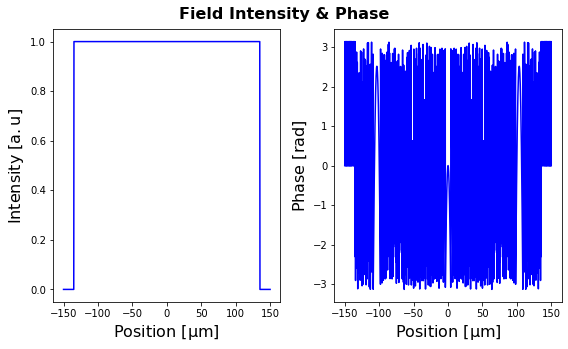

In [4]:
energy = 10000 # Photon beam energy [eV]
nx = 2000 # Number of sampling points
xdim = 300e-6 # Size of viewing window
pixel = xdim/nx # Pixel size [m]
aperture_size = 270e-6 # Optic aperture size [m]
focal_length = 125e-3 # Lens focal length [m]

field = field1d(nx, energy, pixel)
aperutre = aperture_1d(field, aperture_size)
lens = ideal_lens_1d(aperutre, focal_length)
plot_intensity_phase(lens, show=True)

Focal Size (FWHM): 48.68639177946608 nm


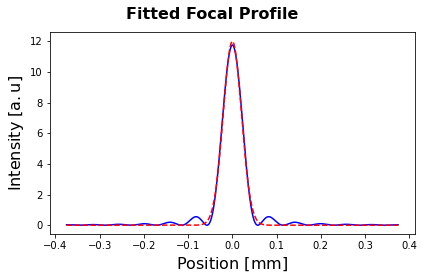

In [5]:
distance = focal_length # Distance to propagation plane [m]
pfactor = 0.25e-2 # Propagation plane pixel resize factor
sfactor = 1 # Number of sampling points factor in the propagation plane

focus = lens.copy()
focus = focus.propagate(focal_length, method='fresnel-kirchoff', pfactor=pfactor, sfactor=sfactor)
fit_gaussian_profile(focus, show=True)

In [5]:
nz = 128 # Number of propgation planes in beam caustic 
prange = [-1e-3, 1e-3] # Relative range of propgation [m]
start = focal_length # Start position of the propagation [m]
pfactor = 1e-2 # Propagation plane pixel resize factor
sfactor = 1 # Number of sampling points factor in the propagation plane

caustic = lens.copy()
caustic = caustic.beam_caustic(nz, prange, method='fresnel-kirchoff', start=start, pfactor=pfactor, sfactor=sfactor, verbose=1)

iteration: 1/128 - propagating: 0.124 m
iteration: 2/128 - propagating: 0.12401574803149606 m
iteration: 3/128 - propagating: 0.12403149606299213 m
iteration: 4/128 - propagating: 0.12404724409448818 m
iteration: 5/128 - propagating: 0.12406299212598425 m
iteration: 6/128 - propagating: 0.12407874015748031 m
iteration: 7/128 - propagating: 0.12409448818897638 m
iteration: 8/128 - propagating: 0.12411023622047244 m
iteration: 9/128 - propagating: 0.12412598425196851 m
iteration: 10/128 - propagating: 0.12414173228346456 m
iteration: 11/128 - propagating: 0.12415748031496063 m
iteration: 12/128 - propagating: 0.1241732283464567 m
iteration: 13/128 - propagating: 0.12418897637795276 m
iteration: 14/128 - propagating: 0.12420472440944882 m
iteration: 15/128 - propagating: 0.12422047244094488 m
iteration: 16/128 - propagating: 0.12423622047244094 m
iteration: 17/128 - propagating: 0.12425196850393701 m
iteration: 18/128 - propagating: 0.12426771653543307 m
iteration: 19/128 - propagating: 0

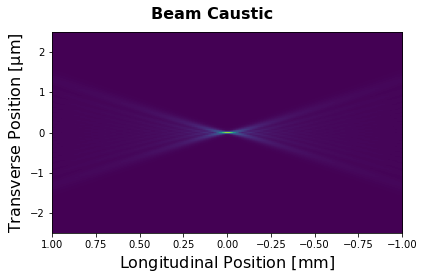

In [6]:
plot_beam_caustic(caustic, show=True)

Peak Longitudinal Position: 0.007874015748031513 mm


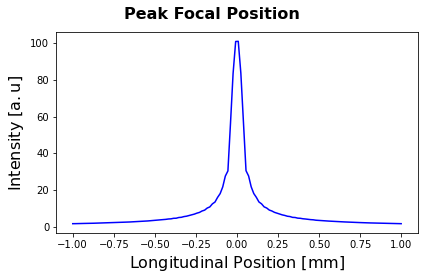

In [7]:
plot_peak_focal(caustic, show=True)